In [4]:
import cv2
import numpy as np
import sys

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break

    edge = cv2.Canny(frame, 50, 150)
    flip = cv2.flip(frame, 1)
    
    cv2.imshow('image', frame)
    cv2.imshow('edge', edge)
    cv2.imshow('flip', flip)
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (c,y), (0,0,255), 10, cv2.LINE_AA)
            cv3.imshow('image', img)
            oldx, oldy = x,y
            
img = np.ones((600,1200,3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def call_trackvar(pos):
    img[:] = np.round(img1*(pos/255), 0).astype(np.uint8)
    cv2.imshow('image', img)

img = cv2.imread('./lenna.bmp', 0)

img1 = img.copy()

cv2.imshow('image', img)
cv2.createTrackbar('Level', 'image', 0, 255, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src1 = cv2.imread('./lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128,128), 100, 200, -1)
cv2.circle(src2, (128,128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.subtract(src1, src2)
dst3 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('add', dst1)
cv2.imshow('subtract', dst2)
cv2.imshow('addweighted', dst3)
cv2.imshow('abs', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('./flowers.jpg')

b,g,r = cv2.split(img)

cv2.imshow('img', img)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# ====================================================================

In [2]:
import matplotlib.pyplot as plt

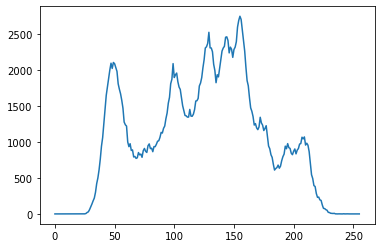

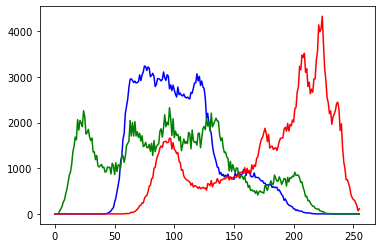

In [7]:
# 그레이스케일 영상의 히스토그램
src = cv2.imread('./lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.waitKey()

cv2.destroyAllWindows()

plt.plot(hist)
plt.show()

# 컬러 영상의 히스토그램
src = cv2.imread('./lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()


# b, g, r = cv2.split(src)

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

plt.plot(hist_b, color = "b")
plt.plot(hist_g, color = "g")
plt.plot(hist_r, color = "r")
plt.show()


# colors = ['b', 'g', 'r']
# bgr_planes = cv2.split(src)
# print(src)
# print(bgr_planes)


# for (p, c) in zip(bgr_planes, colors):
#     hist = cv2.calcHist([p], [0], None, [256], [0, 256])
#     plt.plot(hist, color=c)

# cv2.imshow('src', src)
# cv2.waitKey()

# plt.show()

# cv2.destroyAllWindows()

In [12]:
def getGrayHistImage(hist):
    imgHist = np.full((200, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x, 200 - int(hist[x, 0] * 200 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist


src = cv2.imread('./lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()

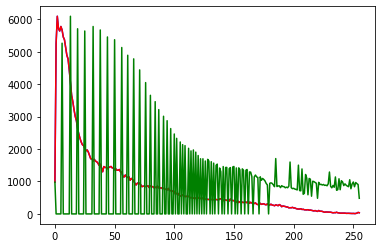

In [13]:
# src = cv2.imread('./fig3/puppy_shrink.png', 0)
src = cv2.imread('./fig3/manjang.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_2)


# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
# minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
# print(minVal, maxVal)
# dst_norm = np.clip((src - minVal)*255./(maxVal-minVal), 0, 255).astype(np.uint8)

# cv2.normalize(src, dst=None, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: 정규화 최소값 (예, 0)
# beta: 정규화 최댓값 (예, 155)
# norm_type: cv2.NORM_MINMAX
# dtype =  -1, src와 같은 type

dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_equal = cv2.equalizeHist(src)

# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])
hist_equal = cv2.calcHist([dst_equal], [0], None, [256], [0, 256])


plt.plot(hist, color = 'b')
plt.plot(hist_norm , color = 'r')
plt.plot(hist_equal , color = 'g')


plt.show()

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)


cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
src = cv2.imread('./fig3/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)

# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h, s, v_norm))
dst_equal = cv2.merge((h, s, v_equal))

dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR)



cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)


cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
src = cv2.imread('./fig3/palette.png')
# src = cv2.imread('./fig3/palette_dark.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst1 = cv2.inRange(src, (0,100,0), (100,255,100))
dst2 = cv2.inRange(src_hsv, (50,50,0), (70,255,255))

dst = cv2.copyTo(src, dst2)

cv2.imshow('src', src)
cv2.imshow('dst_bgr', dst1)
cv2.imshow('dst_hsv', dst2)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'dst')
    hmax = cv2.getTrackbarPos('h_max', 'dst')

    dst = cv2.inRange(src, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

src= cv2.imread('./fig3/palette.png')

cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('h_min', 'dst', 50, 179, call_track)
cv2.createTrackbar('h_max', 'dst', 100, 179, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
